##### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 


##### Data Inspection

In [2]:
data = pd.read_csv('Flipkart Mobile - 2.csv')

In [3]:
data.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
data.tail()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77
429,Xiaomi,Redmi 6 Pro,Blue,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,8190,0.36,1.53


In [5]:
shape=data.shape
print('The shape of data is {}'.format(shape))

The shape of data is (430, 16)


In [6]:
size=data.size
print('The size of data is {}'.format(size))

The size of data is 6880


In [7]:
ndim=data.ndim
print('The ndim of data is {}'.format(ndim))

The ndim of data is 2


In [8]:
data.index

RangeIndex(start=0, stop=430, step=1)

In [9]:
data.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [10]:
data.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [11]:
data.head(1)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

##### Missing values 

In [13]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>0]

In [14]:
features_with_na

[]

##### Numerical values

In [15]:
numerical_features =[feature for feature in data.columns if data[feature].dtypes !='O']
print('Number of numerical variables :',len(numerical_features))

Number of numerical variables : 11


In [16]:
data[numerical_features].head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


##### Discrete values

In [17]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25]  
print('Discrete variables count {}'.format(len(discrete_features)))

Discrete variables count 6


In [18]:
data[discrete_features].head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,ratings
0,64,2,4.7,1,1,4.5
1,64,4,5.4,2,1,4.5
2,64,2,4.7,1,1,4.5
3,64,3,6.1,1,1,4.6
4,128,4,6.1,2,1,4.6


##### Continuous values

In [19]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print('Continuous feature count {}'.format(len(continuous_features)))

Continuous feature count 5


In [20]:
data[continuous_features].head()

,battery_capacity,num_of_ratings,sales_price,discount_percent,sales
0,1800,38645,32999,0.17,127.52
1,2815,244,57149,0.04,1.39
2,1800,38645,32999,0.17,127.52
3,2942,5366,42999,0.10,23.07
4,2815,745,69149,0.02,5.15


##### Relationship 

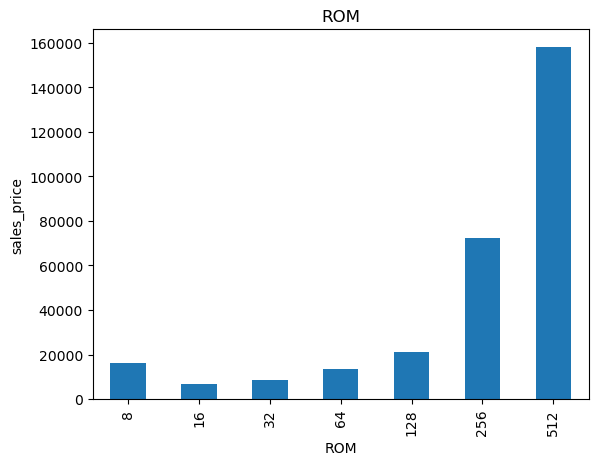

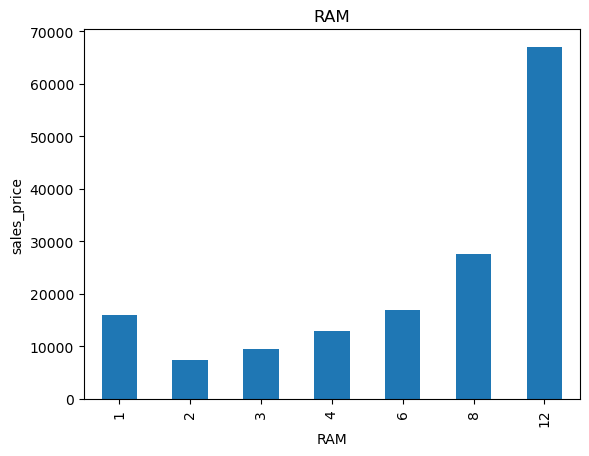

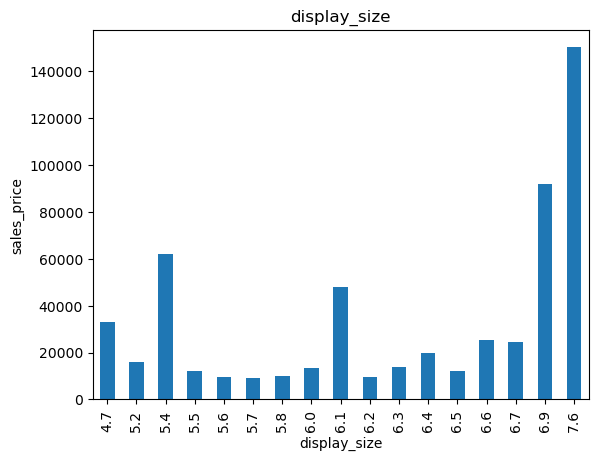

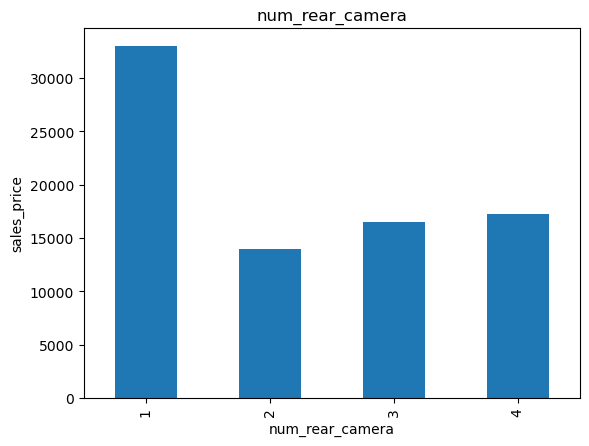

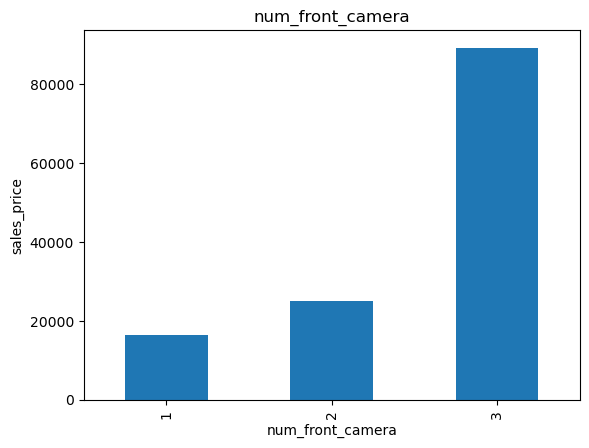

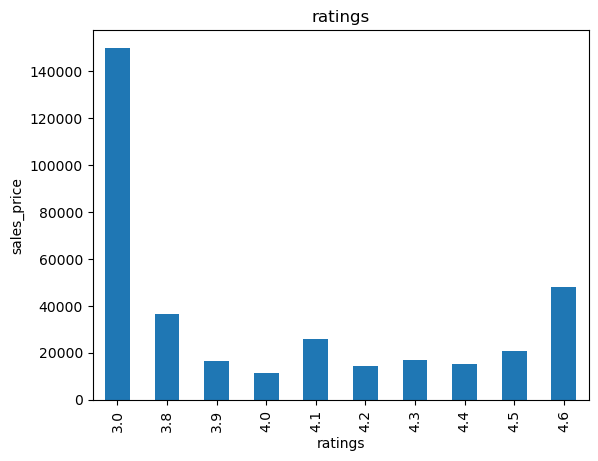

In [21]:
for feature in discrete_features:
    data=data.copy()
    data.groupby(feature)['sales_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sales_price')
    plt.title(feature)
    plt.show()

##### Observations :

1. ROM vs Sales Price :

As ROM increases the sales price increases 
ROM is essential part of a device hence it has an impact on the sales price

2. RAM vs Sales Price : 

Higher the RAM of the device higher it will be priced

3. Dsiplay vs Sales Price :

Customers are looking out for Large display and are ready to pay much for it

4. Num of cameras vs Sales Price : 

Here the data says 1 camera device is costly but it maybe that the entries for 1 camera devices are more 
There is seen a shift from 1 camera to multiple cameras 

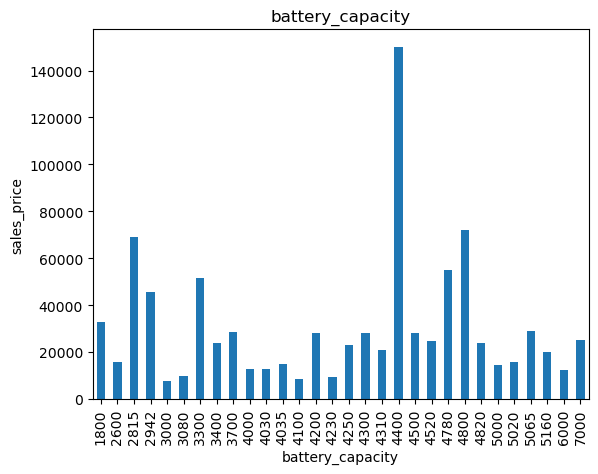

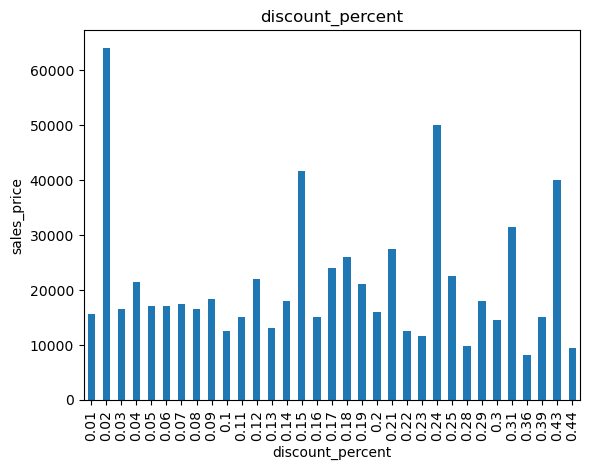

In [23]:
continuous_features1 = ['battery_capacity','discount_percent']
for feature in continuous_features1:
    data=data.copy()
    data.groupby(feature)['sales_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sales_price')
    plt.title(feature)
    plt.show()

##### Observations :

1. Battery Vs Sales Price

##### Count

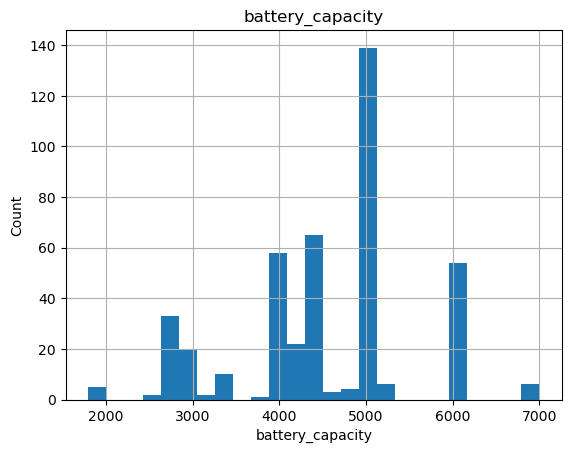

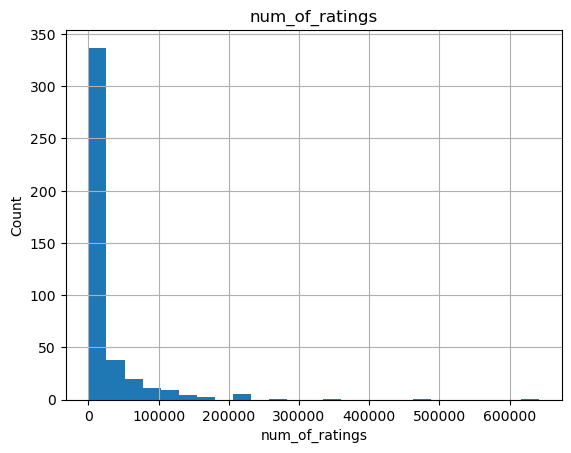

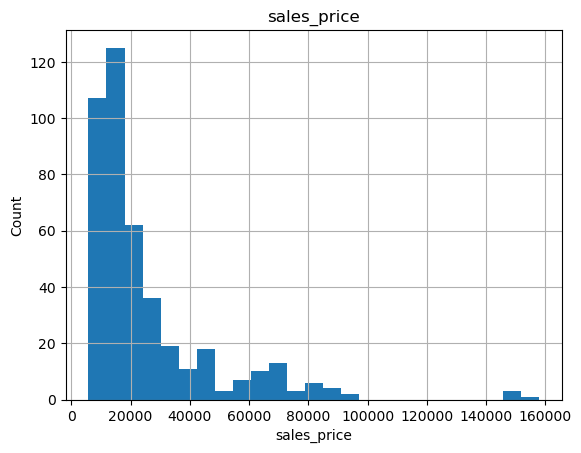

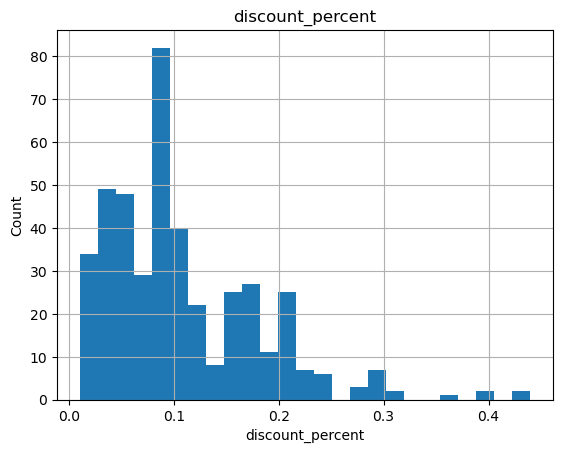

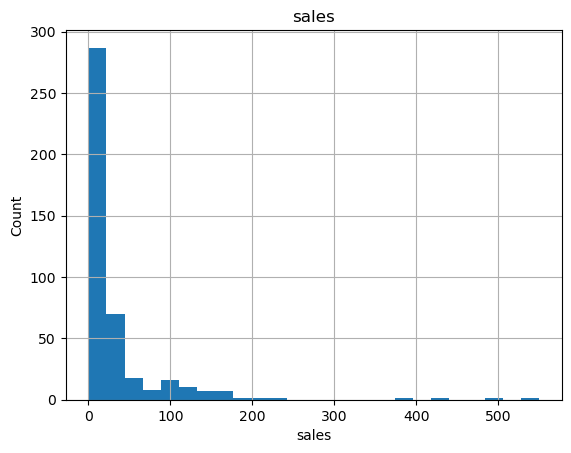

In [24]:
for feature in continuous_features :
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

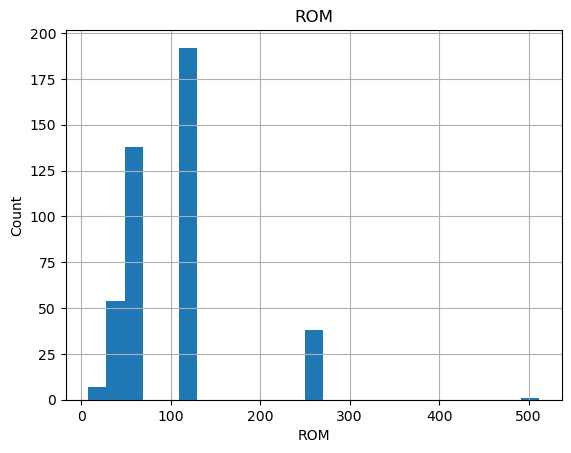

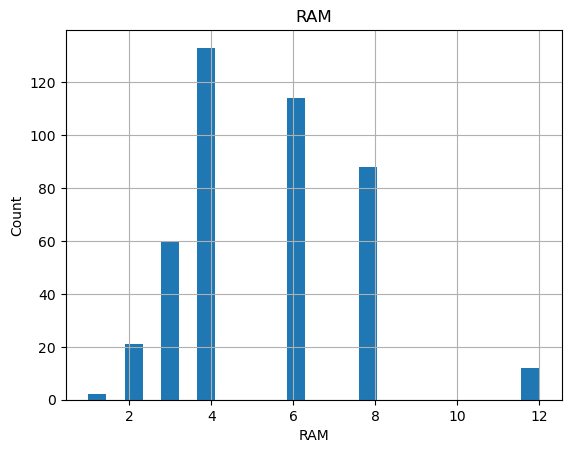

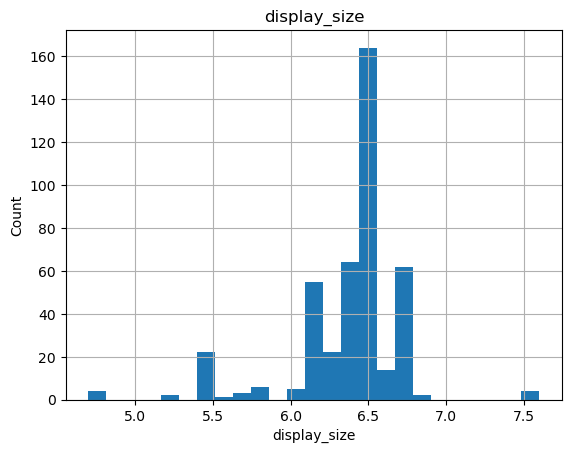

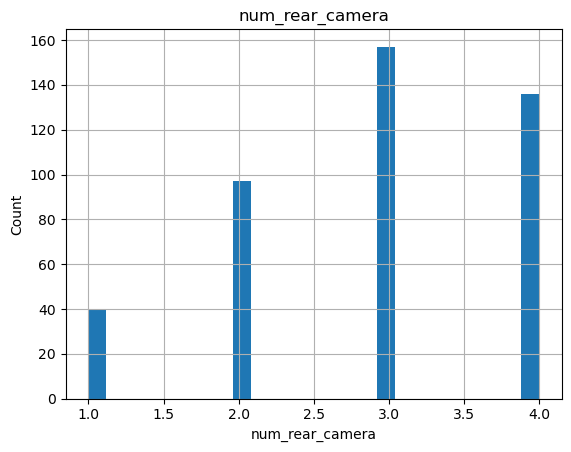

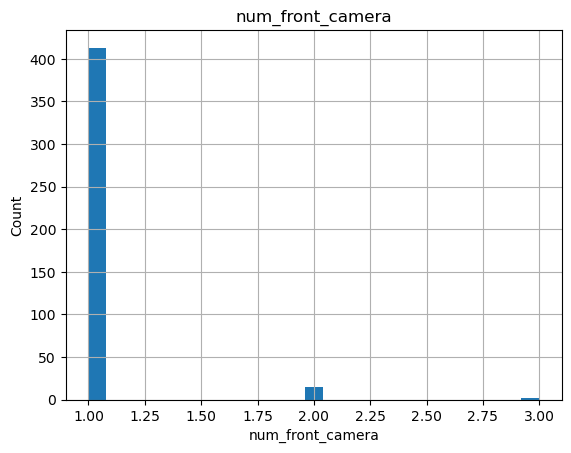

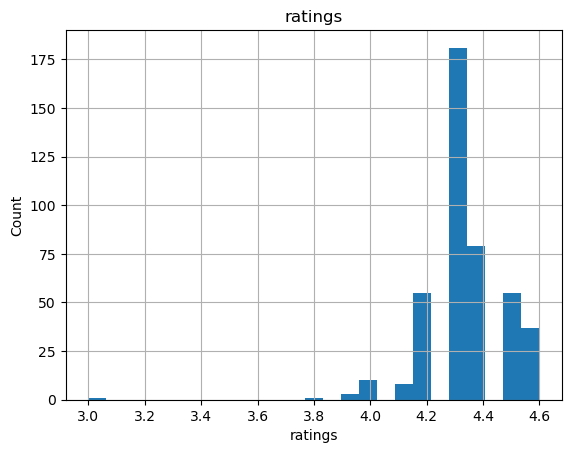

In [25]:
for feature in discrete_features :
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

##### Outliers Check 

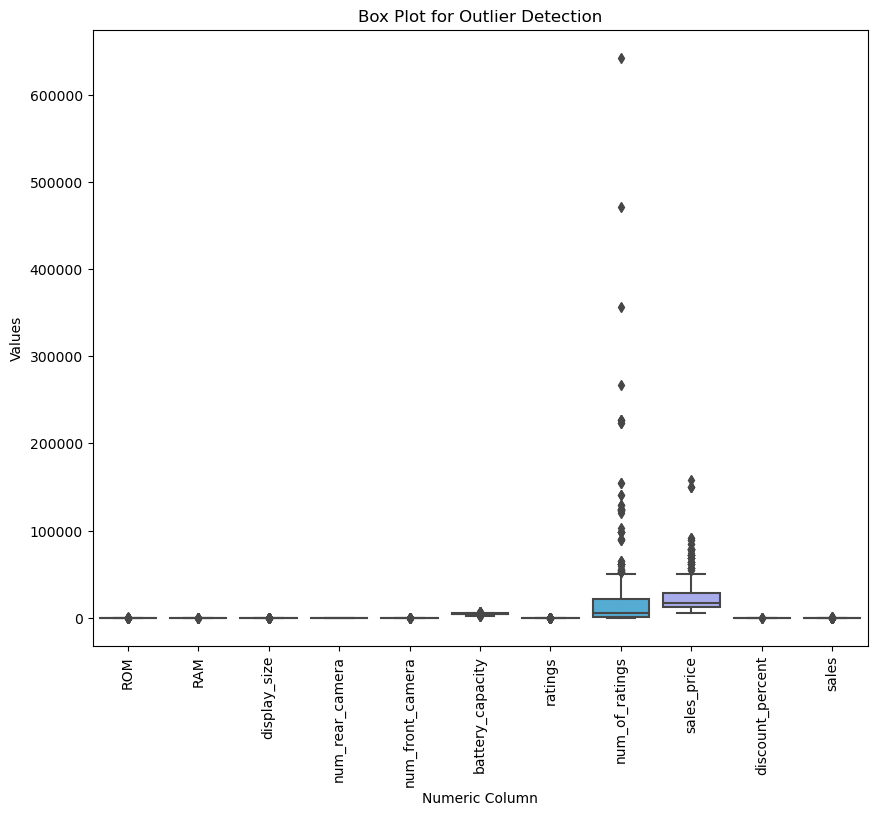

In [26]:
from matplotlib.pyplot import xticks
column_to_plot = numerical_features

# Create the box plot using seaborn
plt.figure(figsize=(10,8))
sns.boxplot(data=data[column_to_plot])

# Set the title and labels
plt.title('Box Plot for Outlier Detection')
plt.xlabel('Numeric Column')
plt.ylabel('Values')
plt.xticks(rotation = 90)


# Show the plot
plt.show()

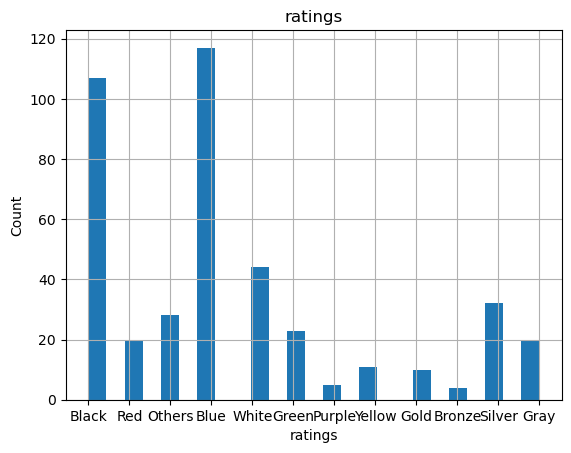

In [66]:
data['base_color'].hist(bins=25)
plt.xlabel(feature)
plt.ylabel('Count')
plt.title(feature)
plt.show()

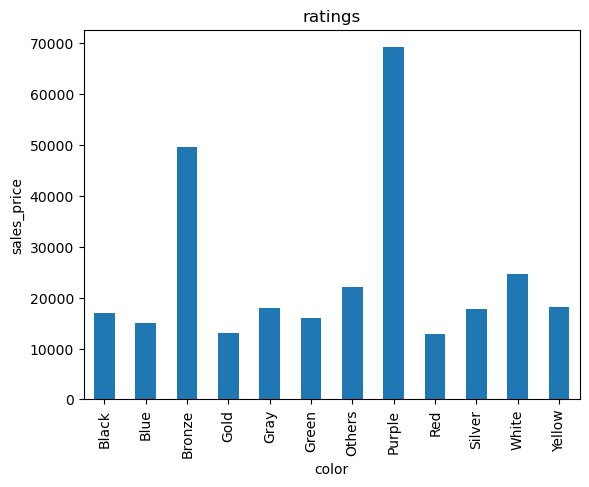

In [67]:
data.groupby('base_color')['sales_price'].median().plot.bar()
plt.xlabel('color')
plt.ylabel('sales_price')
plt.title(feature)
plt.show()

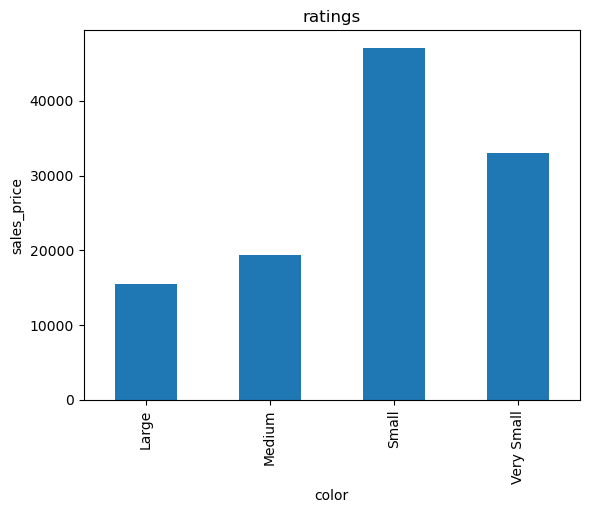

In [69]:
data.groupby('screen_size')['sales_price'].median().plot.bar()
plt.xlabel('color')
plt.ylabel('sales_price')
plt.title(feature)
plt.show()

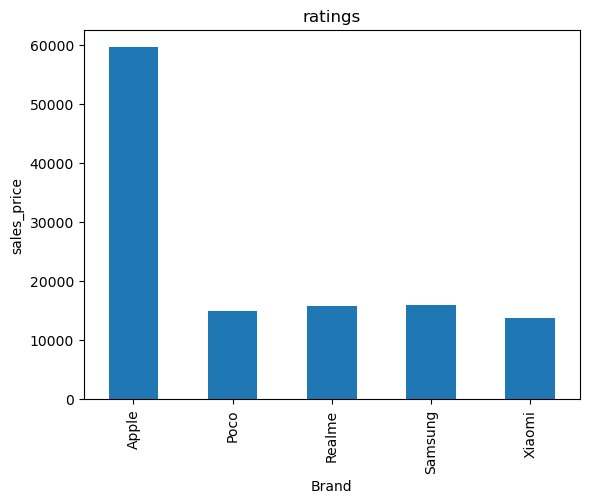

In [68]:
data.groupby('brand')['sales_price'].median().plot.bar()
plt.xlabel('Brand')
plt.ylabel('sales_price')
plt.title(feature)
plt.show()

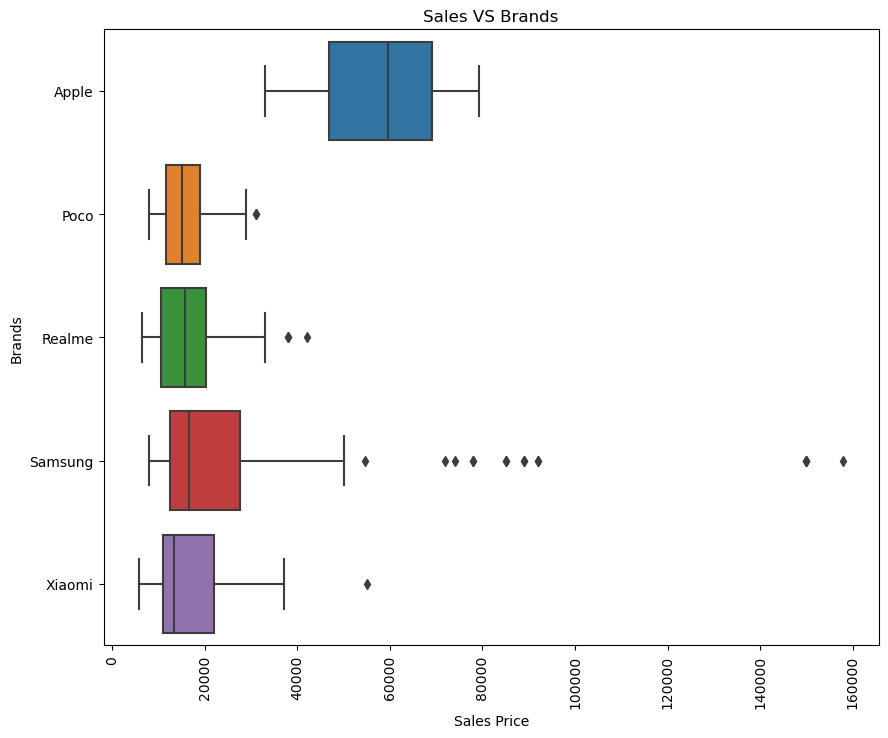

In [27]:
# Create the box plot using seaborn
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='sales_price',y='brand')

# Set the title and labels
plt.title('Sales VS Brands')
plt.xlabel('Sales Price')
plt.ylabel('Brands')
plt.xticks(rotation = 90)


# Show the plot
plt.show()

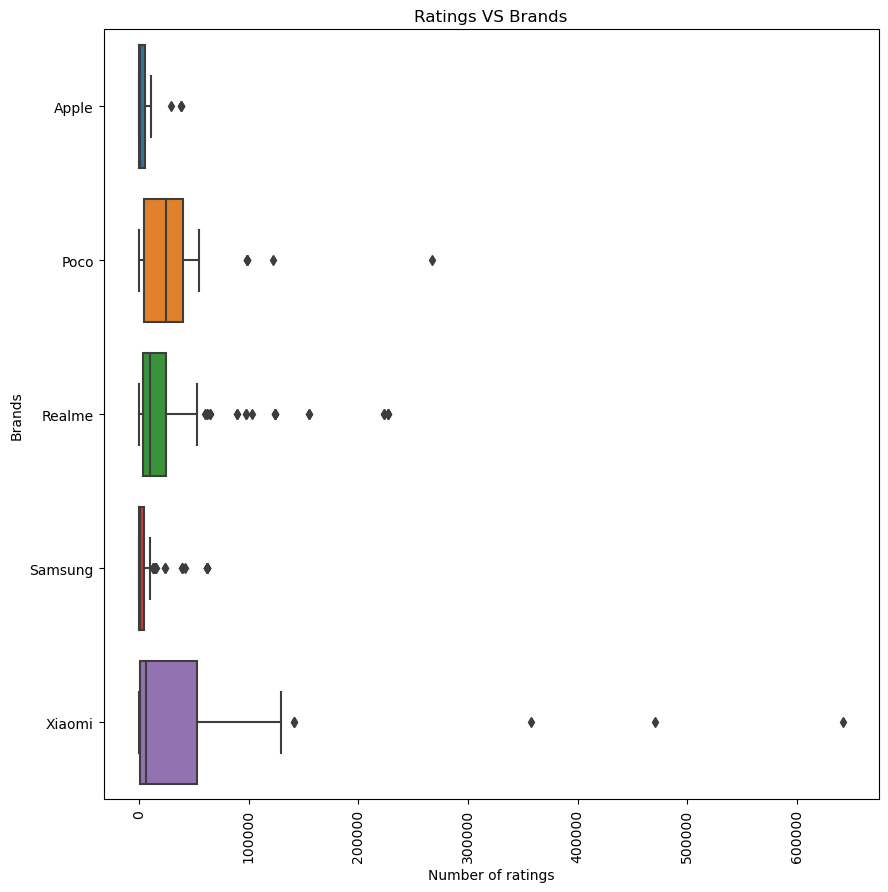

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='num_of_ratings',y='brand')

# Set the title and labels
plt.title('Ratings VS Brands')
plt.xlabel('Number of ratings')
plt.ylabel('Brands')
plt.xticks(rotation = 90)


# Show the plot
plt.show()

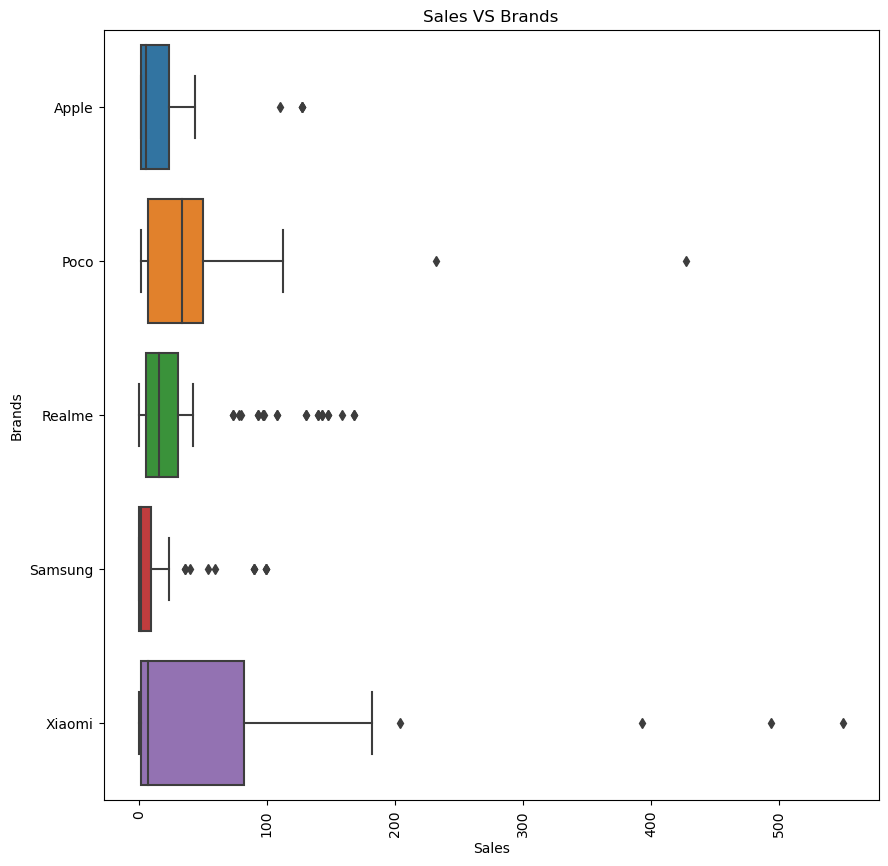

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='sales',y='brand')

# Set the title and labels
plt.title('Sales VS Brands')
plt.xlabel('Sales')
plt.ylabel('Brands')
plt.xticks(rotation = 90)


# Show the plot
plt.show()

##### Handling Outliers 

In [30]:
data = data.drop('num_of_ratings', axis=1)

In [31]:
data

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8299,0.07,6.77


In [32]:
data[(data['brand']=='Poco') & (data['sales']>200)]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price,discount_percent,sales
98,Poco,F1,Black,Qualcomm,Medium,128,6,6.2,2,1,4000,4.6,18999,0.09,231.79
110,Poco,X2,Red,Qualcomm,Large,128,6,6.7,4,2,4500,4.5,15999,0.20,427.22


In [33]:
data.drop(98,inplace=True)

In [34]:
data.drop(110,inplace=True)

In [35]:
data[(data['brand']=='Xiaomi') & (data['sales']>300)]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price,discount_percent,sales
395,Xiaomi,Redmi Note 4,Gold,Qualcomm,Small,32,3,5.5,1,1,4100,4.4,8565,0.04,550.19
396,Xiaomi,Redmi Note 5,Black,Qualcomm,Medium,64,4,6.0,1,1,4000,4.4,10999,0.04,392.73
418,Xiaomi,Mi A1,Black,Qualcomm,Small,64,4,5.5,2,1,3080,4.4,10490,0.25,493.98


In [36]:
data.drop(395,inplace=True)
data.drop(396,inplace=True)

In [37]:
data.drop(418,inplace=True)

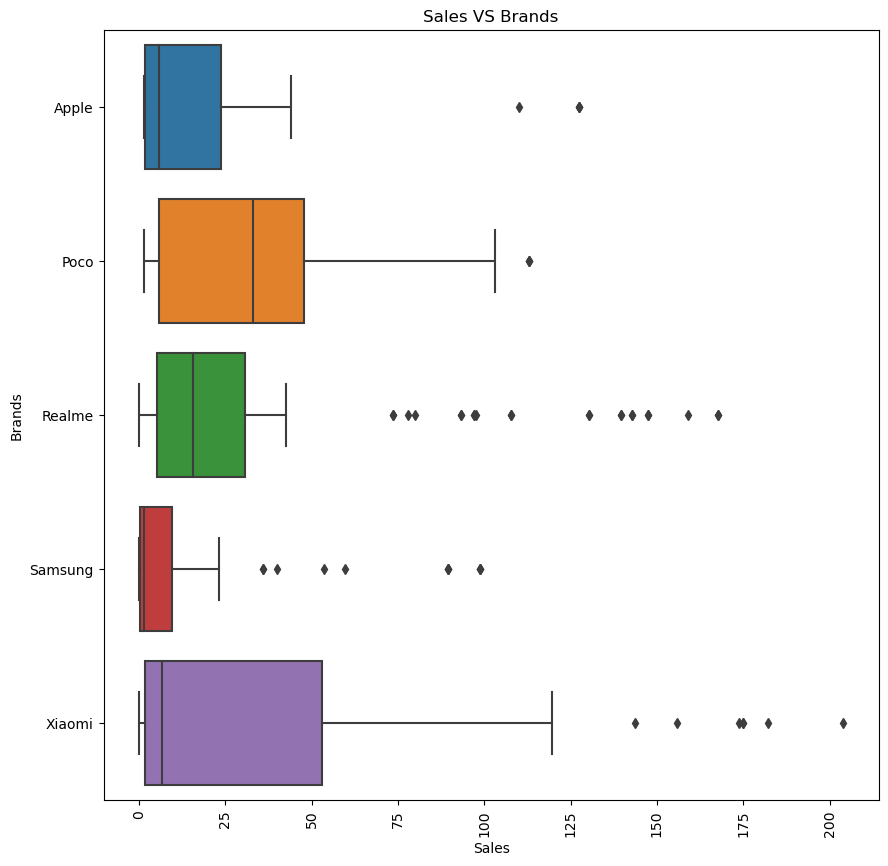

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='sales',y='brand')

# Set the title and labels
plt.title('Sales VS Brands')
plt.xlabel('Sales')
plt.ylabel('Brands')
plt.xticks(rotation = 90)


# Show the plot
plt.show()

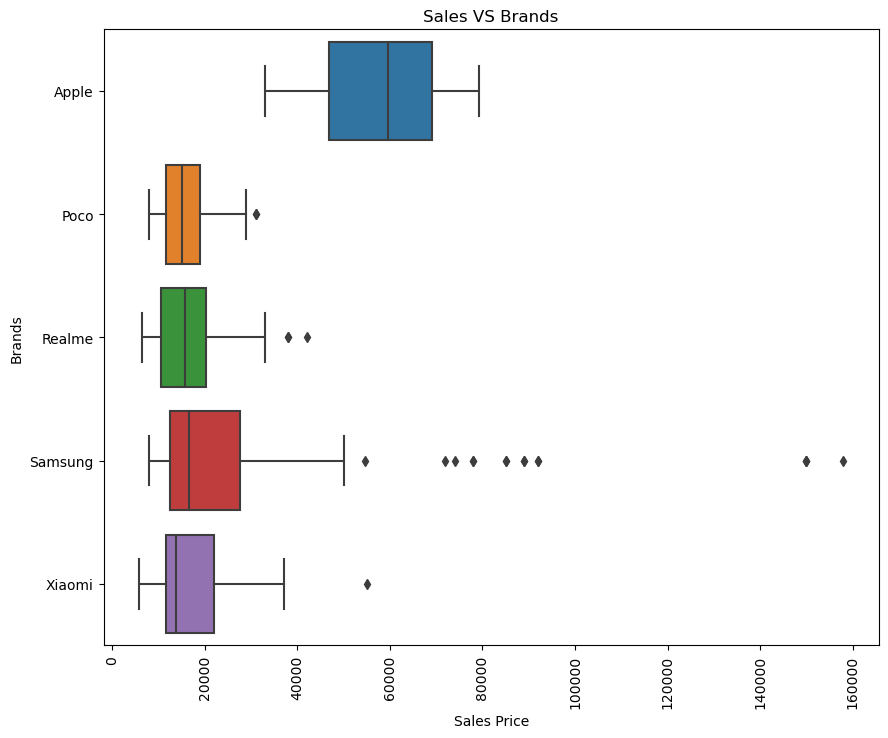

In [39]:
# Create the box plot using seaborn
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='sales_price',y='brand')

# Set the title and labels
plt.title('Sales VS Brands')
plt.xlabel('Sales Price')
plt.ylabel('Brands')
plt.xticks(rotation = 90)


# Show the plot
plt.show()

In [40]:
data[(data['brand']=='Samsung') & (data['sales_price']> 100000)]

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price,discount_percent,sales
303,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,256,12,7.6,3,1,4400,4.4,149999,0.12,0.10
309,Samsung,Galaxy Z Fold3 5G,Black,Qualcomm,Very Large,512,12,7.6,3,1,4400,4.4,157999,0.12,0.11
310,Samsung,Galaxy Z Fold3 5G,Green,Qualcomm,Very Large,256,12,7.6,3,1,4400,4.4,149999,0.12,0.10
328,Samsung,Galaxy Fold 2,Bronze,Qualcomm,Very Large,256,12,7.6,3,3,4500,3.0,149999,0.21,0.15


In [41]:
data = data[data['sales_price'] <= 140000]

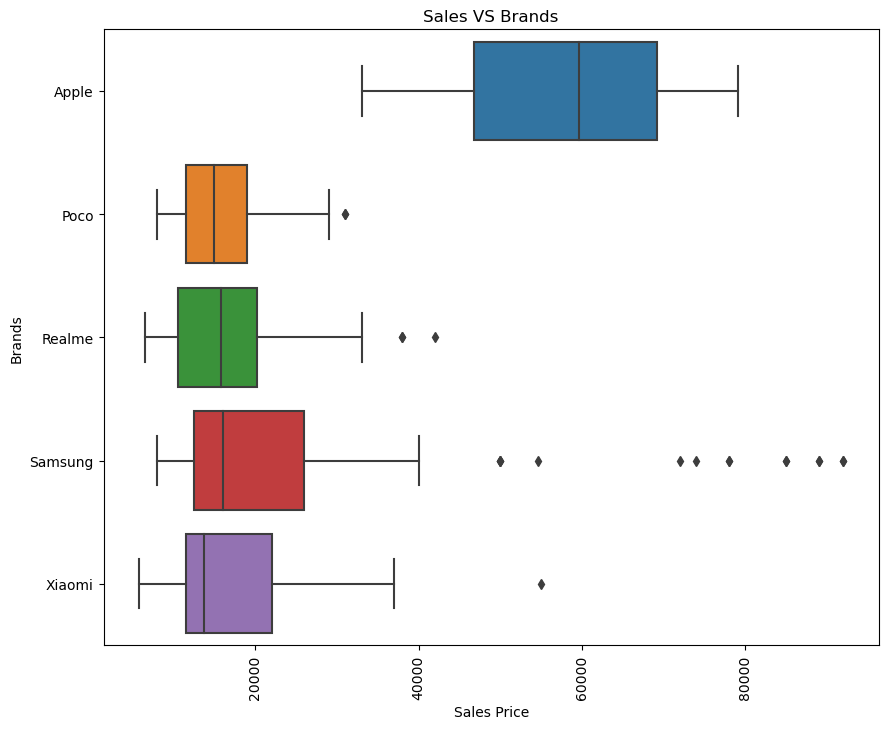

In [42]:
# Create the box plot using seaborn
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='sales_price',y='brand')

# Set the title and labels
plt.title('Sales VS Brands')
plt.xlabel('Sales Price')
plt.ylabel('Brands')
plt.xticks(rotation = 90)


# Show the plot
plt.show()

In [27]:
for feature in continuous_feature:
    data = data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

NameError: name 'continuous_feature' is not defined

In [46]:
data['brand'].value_counts()

Realme     138
Samsung    115
Xiaomi      58
Apple       56
Poco        54
Name: brand, dtype: int64

In [56]:
data['model'].nunique()

113

In [57]:
data['model']

0           iPhone SE
1      iPhone 12 Mini
2           iPhone SE
3           iPhone XR
4           iPhone 12
            ...      
425       Redmi 6 Pro
426       Redmi 6 Pro
427        Mi 11 Lite
428     Redmi 8A Dual
429       Redmi 6 Pro
Name: model, Length: 421, dtype: object

In [78]:
dummy_brand = pd.get_dummies(data[['brand', 'screen_size', 'base_color', 'processor']])

# Concatenate the dummy variables with the original dataframe
data1 = pd.concat([data, dummy_brand], axis=1)

# Drop the original columns
data1.drop(['brand', 'screen_size', 'base_color', 'processor'], axis=1, inplace=True)


In [79]:
data1

,model,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price,discount_percent,sales,brand_Apple,brand_Poco,brand_Realme,brand_Samsung,brand_Xiaomi,screen_size_Large,screen_size_Medium,screen_size_Small,screen_size_Very Small,base_color_Black,base_color_Blue,base_color_Bronze,base_color_Gold,base_color_Gray,base_color_Green,base_color_Others,base_color_Purple,base_color_Red,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
0,iPhone SE,64,2,4.7,1,1,1800,4.5,32999,0.17,127.52,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,iPhone 12 Mini,64,4,5.4,2,1,2815,4.5,57149,0.04,1.39,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,iPhone SE,64,2,4.7,1,1,1800,4.5,32999,0.17,127.52,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,iPhone XR,64,3,6.1,1,1,2942,4.6,42999,0.10,23.07,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,iPhone 12,128,4,6.1,2,1,2815,4.6,69149,0.02,5.15,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Redmi 6 Pro,32,3,5.8,2,1,4000,4.3,7999,0.30,1.50,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,Redmi 6 Pro,64,4,5.8,2,1,4000,4.3,9699,0.28,1.73,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
427,Mi 11 Lite,128,6,6.5,3,1,4250,4.2,21999,0.12,3.42,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
428,Redmi 8A Dual,32,3,6.2,2,1,5000,4.2,8299,0.07,6.77,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


##### Train Test Split

In [169]:
X = data1.drop("sales_price", axis=1)
y = data1["sales_price"]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [171]:
data1.shape

(421, 39)

In [172]:
X_train.shape

(294, 38)

In [173]:
X_test.shape

(127, 38)

In [174]:
y_train.shape

(294,)

In [175]:
y_test.shape

(127,)

##### Scaling

In [176]:
X_train

,model,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,discount_percent,sales,brand_Apple,brand_Poco,brand_Realme,brand_Samsung,brand_Xiaomi,screen_size_Large,screen_size_Medium,screen_size_Small,screen_size_Very Small,base_color_Black,base_color_Blue,base_color_Bronze,base_color_Gold,base_color_Gray,base_color_Green,base_color_Others,base_color_Purple,base_color_Red,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
361,Galaxy A71,128,8,6.7,4,1,4500,4.4,0.21,9.65,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
60,M3,64,6,6.5,3,1,6000,4.3,0.07,47.85,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
163,GT Master Edition,128,6,6.4,3,1,4300,4.1,0.03,0.05,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
373,Redmi 9,128,4,6.5,2,1,5000,4.2,0.08,7.55,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,GT Master Edition,256,8,6.4,3,1,4300,4.3,0.06,0.31,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Galaxy A52,128,8,6.5,4,1,4500,4.4,0.09,0.59,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
365,Galaxy A20s,32,3,6.5,3,1,4000,4.3,0.10,0.26,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
329,Galaxy A50s,128,4,6.4,3,1,4000,4.3,0.39,35.81,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
282,Galaxy A21s,128,6,6.5,4,1,5000,4.2,0.07,2.00,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [186]:
num_vars =['ROM','RAM','display_size','num_rear_camera','battery_capacity','ratings','discount_percent','sales']

In [187]:
scaler = StandardScaler()

# Fit the scaler on X_train_num
scaler.fit(X_train[num_vars])

# Transform X_train_num
X_train_scaled = scaler.transform(X_train[num_vars])

In [180]:
y_train

361    27499
60     11999
163    25999
373    10990
152    29999
       ...  
349    28999
365    11599
329    14999
282    17499
8      69149
Name: sales_price, Length: 294, dtype: int64

In [181]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on y_train
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# Transform y_test using the fitted scaler
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))


In [182]:
X_test

,model,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,discount_percent,sales,brand_Apple,brand_Poco,brand_Realme,brand_Samsung,brand_Xiaomi,screen_size_Large,screen_size_Medium,screen_size_Small,screen_size_Very Small,base_color_Black,base_color_Blue,base_color_Bronze,base_color_Gold,base_color_Gray,base_color_Green,base_color_Others,base_color_Purple,base_color_Red,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
138,8 5G,64,4,6.5,3,1,5000,4.3,0.03,15.27,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
271,Galaxy M31,128,8,6.4,4,1,6000,4.3,0.01,1.60,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
302,Galaxy A21s,64,4,6.5,4,1,5000,4.2,0.16,4.74,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
154,7,64,6,6.5,4,1,5000,4.3,0.16,96.95,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,iPhone 12,64,4,6.1,2,1,2815,4.6,0.02,4.78,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,iPhone 12 Mini,256,4,5.4,2,1,2815,4.5,0.03,1.76,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
19,iPhone 12,256,4,6.1,2,1,2815,4.6,0.02,5.90,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
249,Narzo 20A,64,4,6.5,3,1,5000,4.4,0.20,97.63,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
327,Galaxy S20 FE,128,8,6.5,3,1,4500,4.0,0.24,1.46,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [190]:
scaler = StandardScaler()

# Fit the scaler on X_train_num
scaler.fit(X_test[num_vars])

# Transform X_train_num
X_test_scaled = scaler.transform(X_test[num_vars])

##### Statsmodel :

Method 1 :

Adding all Variables and removing them one by one

In [215]:
X_train_sm = sm.add_constant(X_train_scaled)
lr=sm.OLS(y_train_scaled,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     87.85
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.61e-67
Time:                        17:44:28   Log-Likelihood:                 197.92
No. Observations:                 294   AIC:                            -379.8
Df Residuals:                     286   BIC:                            -350.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1455      0.053      2.727      0.007       0.040       0.251
x1             0.4852      0.043     11.382      0.000       0.401       0.569
x2             0.0589      0.058      1.014      0.312      -0.055       0.173
x3            -0.1443      0.034     -4.223      0.000      -0.212      -0.077
x4            -0.3330      0.055     -6.031      0.000      -0.442      -0.224
x5             0.2200      0.053      4.156      0.000       0.116       0.324
x6             0.0341      0.042      0.811      0.418      -0.049       0.117
x7            -0.2301      0.043     -5.374      0.000      -0.314      -0.146
==============================================================================
Omnibus:                       47.401   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.240
Skew:                           0.861   Prob(JB):                     2.54e-20
Kurtosis:                       5.098   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""